In [28]:
import sys
sys.path.append('../time_alignment/source/')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

import ion_current_to_mach_number as ic_to_mach
reload(ic_to_mach)

import absolute_times as at
reload(at)

import sqlite3

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Connect to database and look up valid shots

In [5]:
connection = sqlite3.connect('../shots_database/shots.db')
cursor = connection.cursor()
cursor.execute('SELECT shot FROM Shots')
shots = cursor.fetchall()
cursor.close()
connection.close()
plane_shots = np.asarray(shots).ravel()

# Look up reference times and probe positions

In [6]:
mach_y = []
mach_y_x_position = []
mach_y_y_position = []
mach_y_z_position = []

mach_z = []
mach_z_x_position = []
mach_z_y_position = []
mach_z_z_position = []

for shot in plane_shots:
    print shot
    
    connection = sqlite3.connect('../shots_database/shots.db')
    connection.row_factory = sqlite3.Row
    cursor = connection.cursor()
    cursor.execute("SELECT * FROM Shots WHERE shot=:shot", {'shot': shot})
    shot_settings = cursor.fetchone()
    
    mach, time, r_background_std, l_background_std = ic_to_mach.mach_number(shot)
    assert shot_settings['mach_orientation'] == 0 or shot_settings['mach_orientation'] == 90
    
    times = at.absolute_times(shot, shot_settings, [], number_of_delays=21)
    time_indexes = np.searchsorted(time, times)
    for i, index in enumerate(time_indexes):
        time_indexes[i] = index-1 +  np.argmin([np.abs(times[i] - time[index - 1]),
                                                np.abs(times[i] - time[index]),
                                                np.abs(times[i] - time[index + 1])])
    
    if shot_settings['mach_orientation'] == 0:
        mach_z_x_position.append(shot_settings['mach_x'])
        mach_z_y_position.append(shot_settings['mach_y'])
        mach_z_z_position.append(shot_settings['mach_z'])
        mach_z.append(mach[time_indexes])
    else:
        mach_y_x_position.append(shot_settings['mach_x'])
        mach_y_y_position.append(shot_settings['mach_y'])
        mach_y_z_position.append(shot_settings['mach_z'])
        mach_y.append(mach[time_indexes])

16690
16691
16692
16693
16694
16695
16696
16697
16698
16699
16700
16701
16702
16703
16704
16705
16706
16707
16708
16709
16710
16711
16712
16713
16714
16715
16716
16717
16718
16719
16720
16721
16722
16723
16724
16725
16863
16865
16866
16867
16868
16869
16870
16871
16872
16873
16874
16875
16876
16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
1699

In [7]:
mach_z = np.asarray(mach_z)
mach_z_x_position = np.asarray(mach_z_x_position)
mach_z_y_position = np.asarray(mach_z_y_position)
mach_z_z_position = np.asarray(mach_z_z_position)

mach_y = np.asarray(mach_y)
mach_y_x_position = np.asarray(mach_y_x_position)
mach_y_y_position = np.asarray(mach_y_y_position)
mach_y_z_position = np.asarray(mach_y_z_position)

In [8]:
mach_y = np.swapaxes(mach_y, 0, 1)
mach_z = np.swapaxes(mach_z, 0, 1)

# Plot $Mach_y$ for z=0.4m plane

Note that the reversal of sign along the x-direction may indicate azimuthal flow

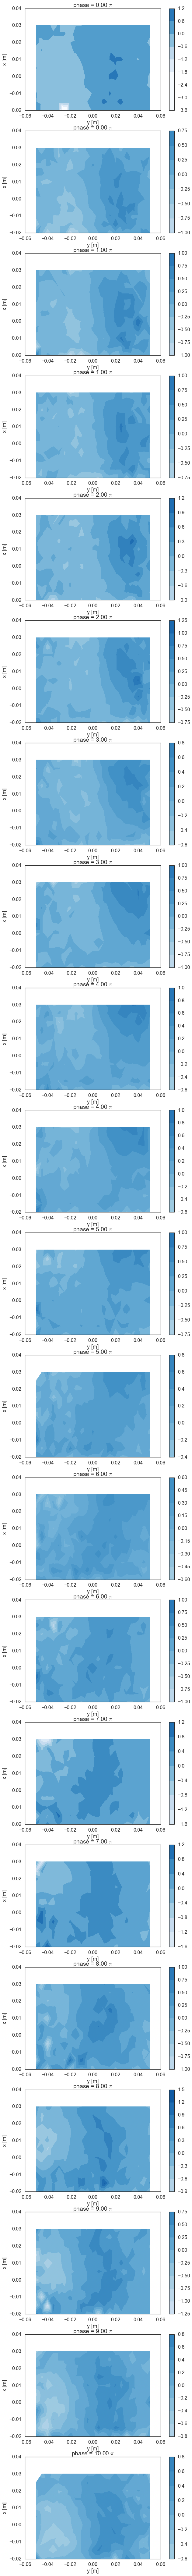

In [45]:
fig, axes = plt.subplots(21, 1, sharex=False, sharey=False, figsize=(10,150))
for phase_point in xrange(21):
    to_remove = np.where(np.invert(np.isfinite(mach_y[phase_point])))
    contourf = axes[phase_point].tricontourf(np.delete(mach_y_x_position, to_remove), 
                                             np.delete(mach_y_y_position, to_remove), 
                                             np.delete(mach_y[phase_point], to_remove),
                                             cmap=plt.get_cmap('Blues'), vmin=-2, vmax=2)
    axes[phase_point].set_xlabel('y [m]')
    axes[phase_point].set_ylabel('x [m]')
    axes[phase_point].grid('off')
    axes[phase_point].set_title(r'phase = %3.2f $\pi$' % (phase_point/(2)))
    
    #divider = make_axes_locatable(axes[phase_point])
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(contourf, ax=axes[phase_point])